In [1]:
from data_generator.main import generate_data, get_real_data, generate_data_schema, GroupDefinition, \
    generate_from_real_data
import matplotlib.pyplot as plt

from data_generator.utils import plot_distribution_comparison, print_distribution_stats, visualize_df, \
    create_parallel_coordinates_plot, plot_and_print_metric_distributions, unique_individuals_ratio, \
    individuals_in_multiple_groups, plot_correlation_matrices
from methods.utils import get_groups

# data, schema = generate_from_real_data('bank')

# %%
# data, schema = get_real_data('bank')

# %%
nb_attributes = 20

# data_obj_synth, schema = generate_from_real_data('bank', nb_groups=10,
#                                                  predefined_groups=predefined_groups[:4],
#                                                  use_cache=False)

# predefined_groups_origin, nb_elements = get_groups(data_obj_synth, data, schema)

# %%


In [12]:
schema = generate_data_schema(min_number_of_classes=2, max_number_of_classes=9, prop_protected_attr=0.4,
                              nb_attributes=nb_attributes)

data = generate_data(
    nb_attributes=10,
    min_number_of_classes=3,
    max_number_of_classes=5,
    nb_groups=100,
    max_group_size=100,
    categorical_outcome=True,
    nb_categories_outcome=4,
    corr_matrix_randomness=1,
    categorical_influence=1,
    # data_schema=schema,
    use_cache=True,
    min_similarity=0.0,
    max_similarity=1.0
    # predefined_groups=predefined_groups,
    # additional_random_rows=30000
)

print(f"Generated {len(data.dataframe)} samples in {data.nb_groups} groups")

Fitting initial GaussianCopulaSynthesizer...
Fitting initial GaussianCopulaSynthesizer...


Sampling conditions: 100%|██████████| 32/32 [00:00<00:00, 531.79it/s]

Sampling conditions: 100%|██████████| 6/6 [00:00<00:00, 101.59it/s]

Generating 100 random groups




Sampling conditions: 100%|██████████| 47/47 [00:00<00:00, 697.96it/s]

Sampling conditions: 100%|██████████| 25/25 [00:00<00:00, 415.77it/s]

Sampling conditions: 100%|██████████| 55/55 [00:00<00:00, 787.50it/s]

Sampling conditions: 100%|██████████| 34/34 [00:00<00:00, 627.98it/s]

Sampling conditions: 100%|██████████| 56/56 [00:00<00:00, 881.49it/s]

Sampling conditions: 100%|██████████| 37/37 [00:00<00:00, 624.88it/s]

Sampling conditions: 100%|██████████| 5/5 [00:00<00:00, 95.30it/s]

Sampling conditions: 100%|██████████| 43/43 [00:00<00:00, 814.86it/s]

Sampling conditions: 100%|██████████| 18/18 [00:00<00:00, 341.56it/s]

Sampling conditions: 100%|██████████| 6/6 [00:00<00:00, 97.92it/s]

Sampling conditions: 100%|██████████| 35/35 [00:00<00:00, 697.06it/s]

Sampling conditions: 100%|██████████| 9/9 [00:00<00:00, 133.96it/s]

Sampling conditions: 100%|██████████| 18/18 [00:00<00:00, 260.27it/s]

Sampling conditions: 100%|██████████| 7/7 [00:00<00:00, 124.88it/s]

Sampling condi

Generated 4837 samples in 100 groups


In [13]:
# %%
import pandas as pd
from path import HERE

df = pd.concat([data.xdf, data.ydf], axis=1)
fig = visualize_df(df, data.attr_columns, data.outcome_column, HERE.joinpath('ll.png'))
fig.show()

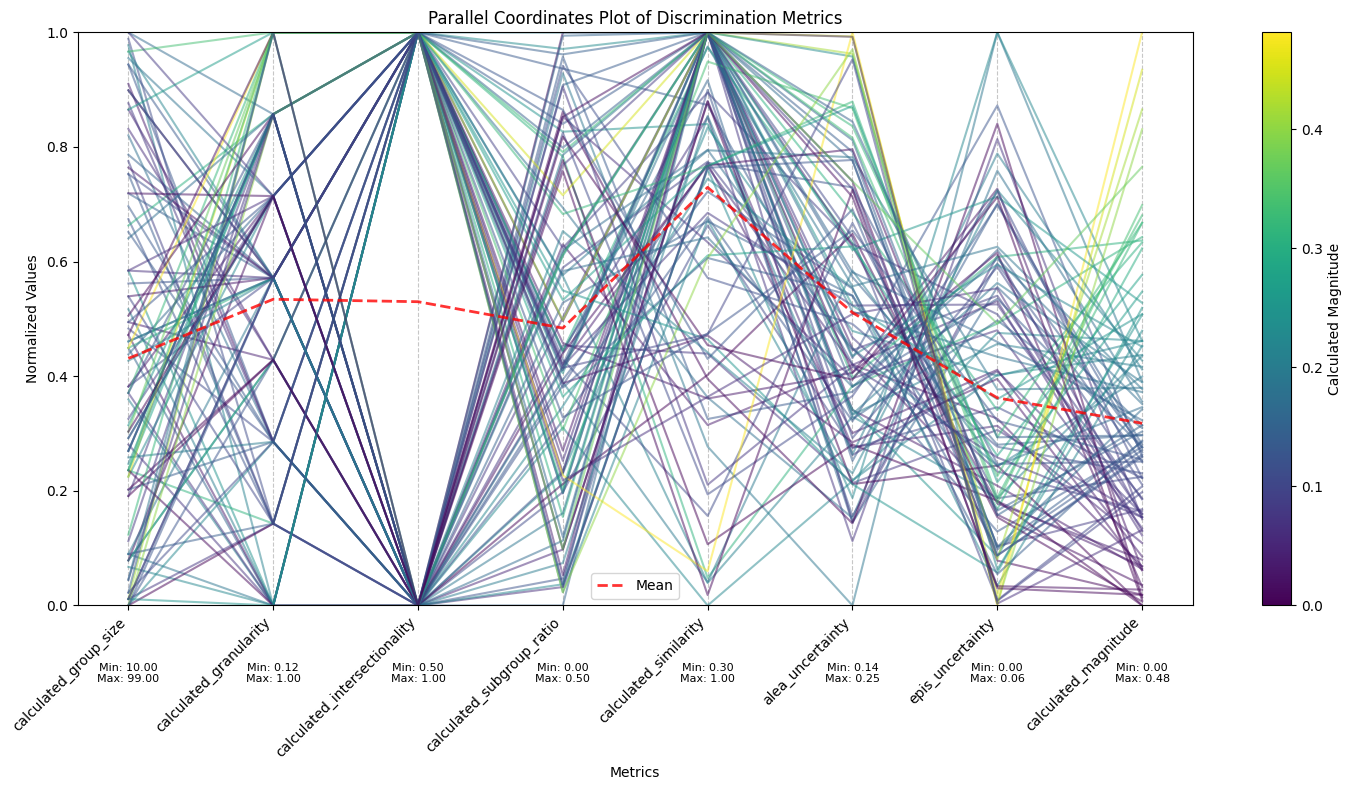

In [14]:
# %%
create_parallel_coordinates_plot(data.dataframe)
plt.show()

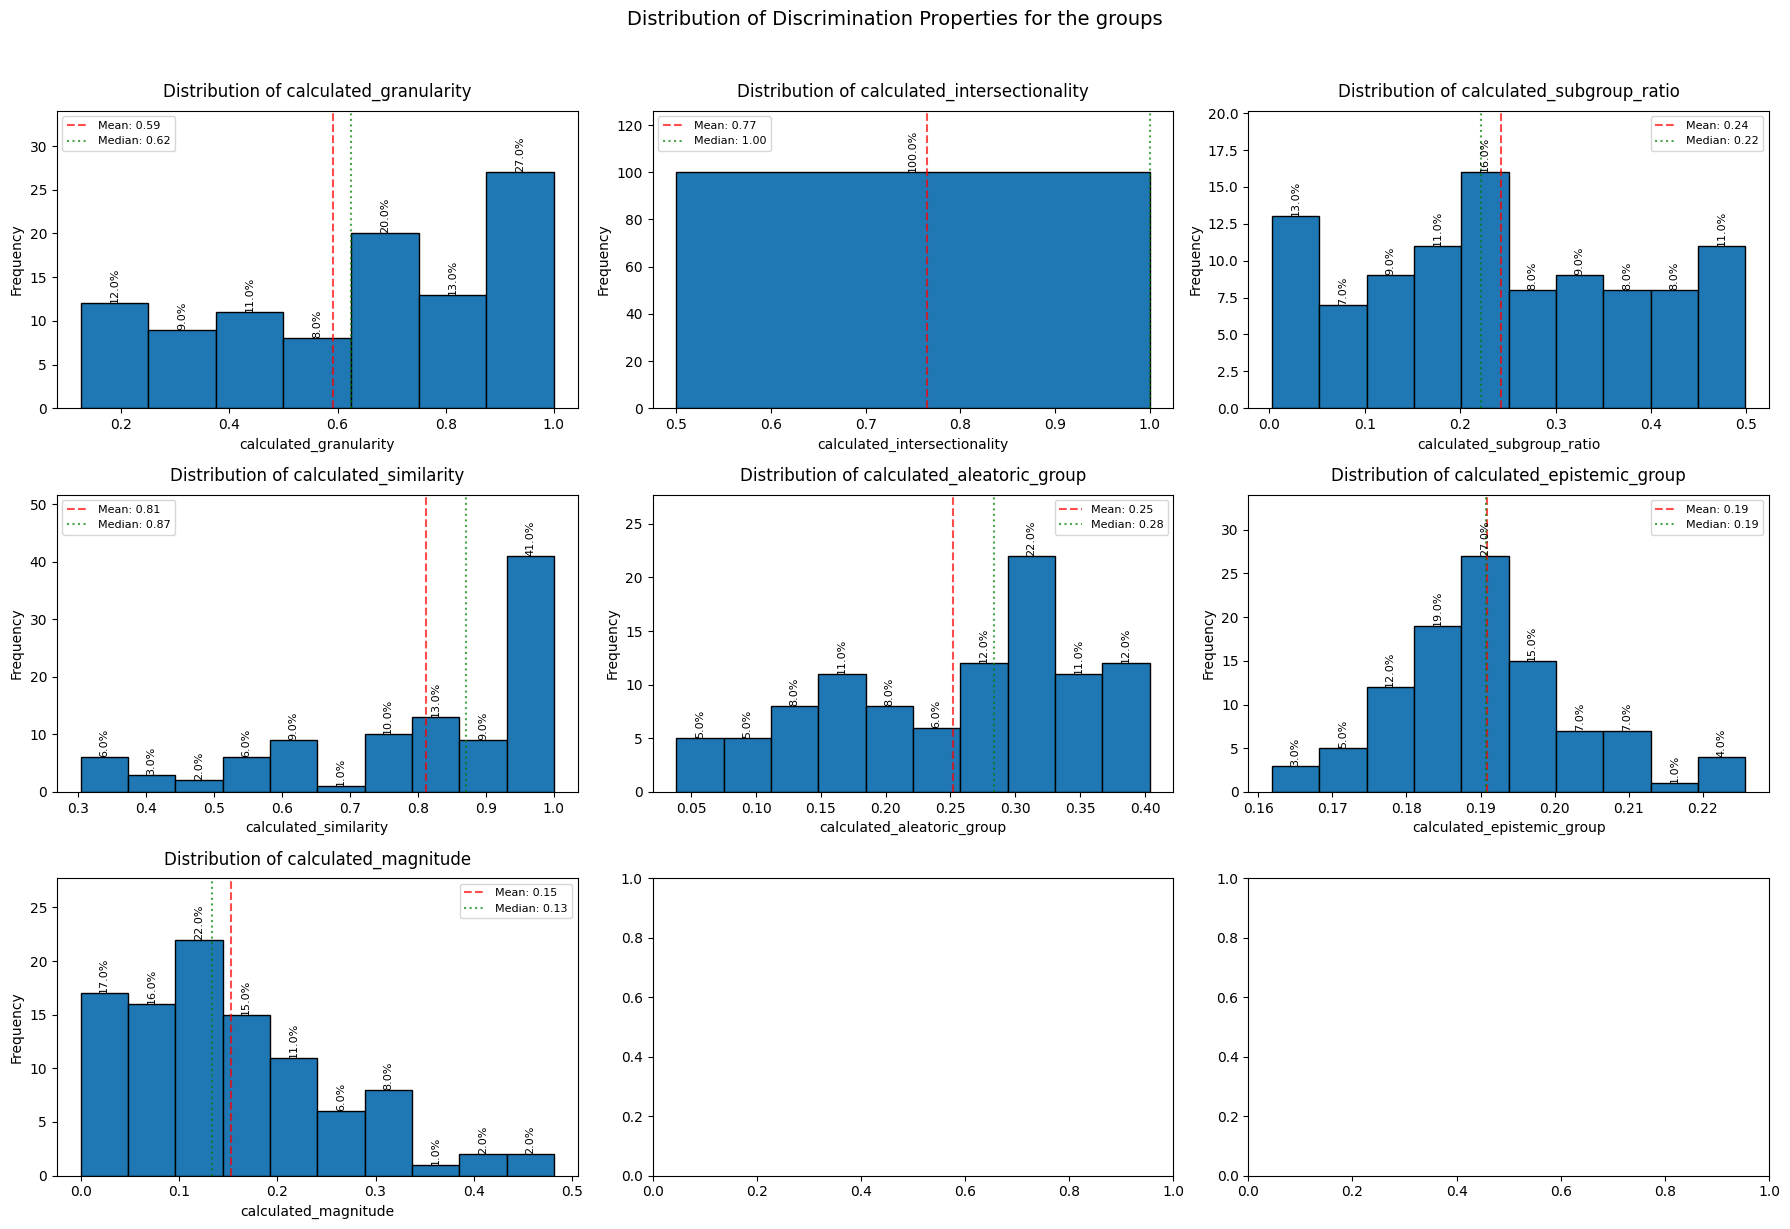

In [16]:
# %%
plot_and_print_metric_distributions(data.dataframe)


Group Summary Table:
                              group_key  Total Rows  Unique Individuals  % Unique
1|1|*|3|*|3|0|1|*|0-1|2|*|3|*|3|0|1|*|0          99                  35     35.35
1|0|*|4|2|*|0|0|3|3-2|0|*|4|2|*|0|4|3|3          99                  20     20.20
*|0|0|*|1|*|0|*|*|*-*|2|3|*|0|*|2|*|*|*          98                  95     96.94
*|*|0|*|*|*|2|0|*|*-*|*|3|*|*|*|0|4|*|*          97                  93     95.88
*|0|0|4|2|*|*|*|0|0-*|0|3|4|2|*|*|*|2|3          96                  57     59.38
1|0|0|4|2|3|2|4|3|0-1|1|3|4|1|3|0|4|0|2          96                   2      2.08
1|0|2|*|1|3|*|3|3|*-1|0|2|*|1|3|*|3|0|*          95                  23     24.21
*|2|0|*|2|3|*|*|3|0-*|2|2|*|1|1|*|*|0|0          94                  65     69.15
*|0|*|*|1|3|1|*|*|*-*|2|*|*|1|3|0|*|*|*          94                  87     92.55
*|*|3|*|*|*|0|0|3|0-*|*|3|*|*|*|0|0|2|0          91                  68     74.73
1|*|3|3|1|1|2|*|*|0-1|*|3|3|1|1|2|*|*|1          90                  57     

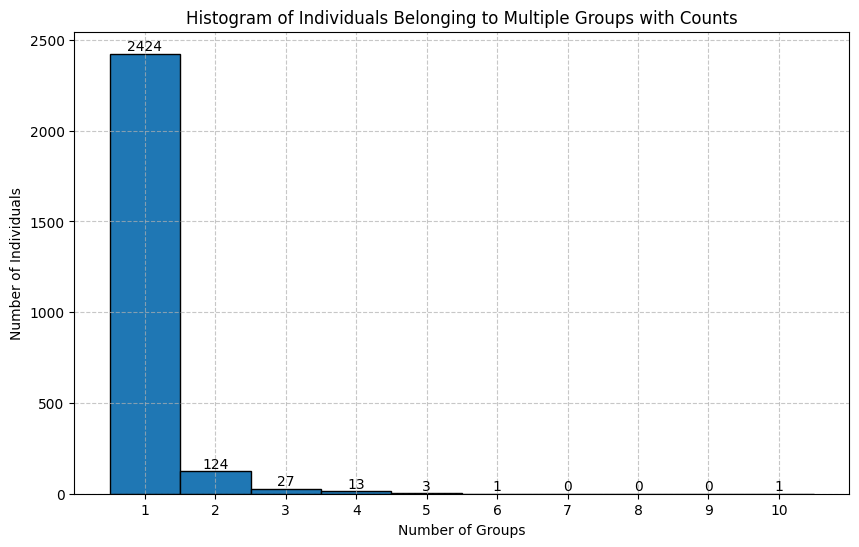

Unique Individuals Ratio: 0.5360760802150093, duplicate : 2244, total: 4837


In [17]:
# %%
# Example usage:
individual_col = 'indv_key'
group_col = 'group_key'

unique_ratio, duplicates_count, total = unique_individuals_ratio(data.dataframe, 'indv_key', data.attr_possible_values)
individuals_in_multiple_groups_count = individuals_in_multiple_groups(data.dataframe, individual_col, group_col)

print(f"Unique Individuals Ratio: {unique_ratio}, duplicate : {duplicates_count}, total: {total}")

In [18]:
# %%
plot_correlation_matrices(schema.correlation_matrix, data)

AssertionError: Correlation matrices have different shapes